[View in Colaboratory](https://colab.research.google.com/github/TemiLee/TemiLee.github.io/blob/master/9_Optimization_Compare.ipynb)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
a. SGD current Iter:  0  Total Cost:  9.669238632637636
a. SGD current Iter:  10  Total Cost:  6.658670209978986
a. SGD current Iter:  20  Total Cost:  4.709372140341866
a. SGD current Iter:  30  Total Cost:  3.382775481452276
a. SGD current Iter:  40  Total Cost:  2.4765219370284033
a. SGD current Iter:  50  Total Cost:  1.9191721039126357
a. SGD current Iter:  60  Total Cost:  1.5635729834782437
a. SGD current Iter:  70  Total Cost:  1.3037538769335792
a. SGD current Iter:  80  Total Cost:  1.1275937789349346
a. SGD current Iter:  90  Total Cost:  0.9886932895582129
-------------------------
b. Momentum current Iter:  0  Total Cost:  9.669098156622722
b. Momentum current Iter:  10  Total Cost:  6.6561671653883865
b. Momentum current Iter:  20  Total Cost:  4.706207552650885
b. Mome

-------------------------
f. RMSprop current Iter:  0  Total Cost:  6.5101857789552735
f. RMSprop current Iter:  10  Total Cost:  1.7557278016671227
f. RMSprop current Iter:  20  Total Cost:  0.5441184619320545
f. RMSprop current Iter:  30  Total Cost:  0.011317952531789712
f. RMSprop current Iter:  40  Total Cost:  0.0003363486824166213
f. RMSprop current Iter:  50  Total Cost:  0.0001625564384211082
f. RMSprop current Iter:  60  Total Cost:  0.00010938079271650851
f. RMSprop current Iter:  70  Total Cost:  8.289092443889222e-05
f. RMSprop current Iter:  80  Total Cost:  6.695395773814729e-05
f. RMSprop current Iter:  90  Total Cost:  5.62507294253918e-05
-------------------------
g. Adam current Iter:  0  Total Cost:  5.594987618632648
g. Adam current Iter:  10  Total Cost:  0.38296085909279975
g. Adam current Iter:  20  Total Cost:  0.09956563998862818
g. Adam current Iter:  30  Total Cost:  0.05269327671552893
g. Adam current Iter:  40  Total Cost:  0.03150587107749636
g. Adam curr

k. noise Noise current Iter:  10  Total Cost:  8.373748543640446
k. noise Noise current Iter:  20  Total Cost:  6.929437996152728
k. noise Noise current Iter:  30  Total Cost:  6.172030131203154
k. noise Noise current Iter:  40  Total Cost:  6.074822056044249
k. noise Noise current Iter:  50  Total Cost:  7.000336010926327
k. noise Noise current Iter:  60  Total Cost:  7.646323205397877
k. noise Noise current Iter:  70  Total Cost:  8.318321514818278
k. noise Noise current Iter:  80  Total Cost:  8.75680868739171
k. noise Noise current Iter:  90  Total Cost:  8.953134913741838
-------------------------
l. noise adam current Iter:  0  Total Cost:  9.70228046352387
l. noise adam current Iter:  10  Total Cost:  9.076893184509418
l. noise adam current Iter:  20  Total Cost:  8.61712416780967
l. noise adam current Iter:  30  Total Cost:  8.186853276259713
l. noise adam current Iter:  40  Total Cost:  7.88507574730527
l. noise adam current Iter:  50  Total Cost:  7.591419368888072
l. noise a

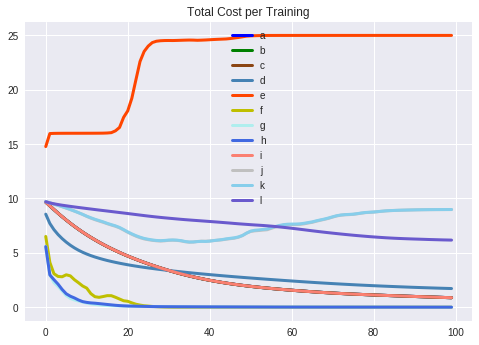

In [7]:
import numpy as np,sys
from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib
np.random.seed(678)

def log(x):
    return 1 / (1 + np.exp(-1 * x))
def d_log(x):
    return log(x) * ( 1 - log(x))

def tanh(x):
    return np.tanh(x)
def d_tanh(x):
    return 1 - np.tanh(x) ** 2 

def ReLu(x):
    mask = (x > 0.0) * 1.0
    return x * mask
def d_ReLu(x):
    mask = (x > 0.0) * 1.0
    return mask    

def elu(matrix):
    mask = (matrix<=0) * 1.0
    less_zero = matrix * mask
    safe =  (matrix>0) * 1.0
    greater_zero = matrix * safe
    final = 3.0 * (np.exp(less_zero) - 1) * less_zero
    return greater_zero + final
def d_elu(matrix):
    safe = (matrix>0) * 1.0
    mask2 = (matrix<=0) * 1.0
    temp = matrix * mask2
    final = (3.0 * np.exp(temp))*mask2
    return (matrix * safe) + final


# 0. Declare Training Data and Labels
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=False)
train = mnist.test
images, labels = train.images, train.labels
only_zero_index,only_one_index = np.where(labels==0)[0],np.where(labels==1)[0]
only_zero_image,only_zero_label = images[[only_zero_index]],np.expand_dims(labels[[only_zero_index]],axis=1)
only_one_image,only_one_label   = images[[only_one_index]],np.expand_dims(labels[[only_one_index]],axis=1)

images = np.vstack((only_zero_image,only_one_image))
labels = np.vstack((only_zero_label,only_one_label))
images,label = shuffle(images,labels)

test_image_num,training_image_num = 20,50
testing_images, testing_lables =images[:test_image_num,:],label[:test_image_num,:]
training_images,training_lables =images[test_image_num:test_image_num+training_image_num,:],label[test_image_num:test_image_num+training_image_num,:]

# 1. Declare Weights
w1 = np.random.randn(784,256) * 0.2
w2 =np.random.randn(256,128) * 0.2
w3 =np.random.randn(128,1) * 0.2

w1_sgd,w2_sgd ,w3_sgd = w1,w2,w3
w1_m,w2_m ,w3_m = w1,w2,w3
w1_ng,w2_ng,w3_ng =  w1,w2,w3
w1_adagrad,w2_adagrad,w3_adagrad =  w1,w2,w3
w1_adadelta,w2_adadelta,w3_adadelta =  w1,w2,w3
w1_RSMprop,w2_RSMprop,w3_RSMprop =  w1,w2,w3
w1_adam,w2_adam,w3_adam =  w1,w2,w3
w1_nadam,w2_nadam,w3_nadam =  w1,w2,w3

w1_sgd_noise,w2_sgd_noise ,w3_sgd_noise = w1,w2,w3
w1_noise,w2_noise,w3_noise  = w1,w2,w3
w1_noise_noise,w2_noise_noise,w3_noise_noise  = w1,w2,w3
w1_noise_adam,w2_noise_adam,w3_noise_adam  = w1,w2,w3



# 2. SAME AMOUNT OF TRAINING
num_epoch = 100
total_cost = 0
learn_rate = 0.0003
cost_array =[]

# # a. SGD
cost_temp_array = []
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_sgd)
        l1A = elu(l1)

        l2 = l1A.dot(w2_sgd)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_sgd)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_sgd.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_sgd.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        w3_sgd = w3_sgd - learn_rate * grad_3
        w2_sgd = w2_sgd - learn_rate * grad_2
        w1_sgd = w1_sgd - learn_rate * grad_1
    if iter %10 == 0 :
        print("a. SGD current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# # ----------------------

# # b. Momentum
v1,v2,v3 = 0,0,0
alpha = 0.001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_m)
        l1A = elu(l1)

        l2 = l1A.dot(w2_m)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_m)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_m.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_m.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        v3 = v3 * alpha + learn_rate * grad_3
        v2 = v2 * alpha + learn_rate * grad_2
        v1 = v1 * alpha + learn_rate * grad_1

        w3_m = w3_m - v3
        w2_m = w2_m - v2
        w1_m = w1_m - v1
    if iter %10 == 0 :
        print("b. Momentum current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# # ----------------------


# # c. Nesterov accelerated gradient
v1,v2,v3 = 0,0,0
alpha = 0.001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_ng)
        l1A = elu(l1)

        l2 = l1A.dot(w2_ng)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_ng)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_ng.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_ng.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        # ------- FAKE GRADIENT --------
        fake_w3_ng = w3_ng - alpha * v3
        fake_w2_ng = w2_ng - alpha * v2
        fake_w1_ng = w1_ng - alpha * v1
        
        l1 = current_image.dot(fake_w1_ng)
        l1A = elu(l1)

        l2 = l1A.dot(fake_w2_ng)
        l2A = tanh(l2)       

        l3 = l2A.dot(fake_w3_ng)
        l3A = log(l3)   

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3_fake =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(fake_w3_ng.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2_fake =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(fake_w2_ng.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1_fake =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)
        # ------- FAKE GRADIENT --------

        v3 = v3 * alpha + learn_rate * grad_3_fake
        v2 = v2 * alpha + learn_rate * grad_2_fake
        v1 = v1 * alpha + learn_rate * grad_1_fake

        w3_ng = w3_ng - v3
        w2_ng = w2_ng - v2
        w1_ng = w1_ng - v1
    if iter %10 == 0 :
        print("c. Nesterov accelerated gradient current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# # ----------------------


# # d. Adagrad
Adagrad_lr_1,Adagrad_lr_2,Adagrad_lr_3 = 0,0,0
Adagrad_e = 0.00000001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_adagrad)
        l1A = elu(l1)

        l2 = l1A.dot(w2_adagrad)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_adagrad)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_adagrad.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_adagrad.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        Adagrad_lr_3 = Adagrad_lr_3 + grad_3 ** 2
        Adagrad_lr_2 = Adagrad_lr_2 + grad_2 ** 2
        Adagrad_lr_1 = Adagrad_lr_1 + grad_1 ** 2

        w3_adagrad = w3_adagrad - (learn_rate/np.sqrt(Adagrad_lr_3 + Adagrad_e)) *grad_3
        w2_adagrad = w2_adagrad - (learn_rate/np.sqrt(Adagrad_lr_2 + Adagrad_e)) *grad_2
        w1_adagrad = w1_adagrad - (learn_rate/np.sqrt(Adagrad_lr_1 + Adagrad_e)) *grad_1
    if iter %10 == 0 :
        print("d. Adagrad current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------


# e. Adadelta
AdaDelta_e,AdaDelta_v = 0.000001,0.001
AdaDelta_1,AdaDelta_2,AdaDelta_3 = 0,0,0
AdaDelta_1_v,AdaDelta_2_v,AdaDelta_3_v = 0,0,0
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_adadelta)
        l1A = elu(l1)

        l2 = l1A.dot(w2_adadelta)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_adadelta)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_adadelta.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_adadelta.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        AdaDelta_3 = AdaDelta_v * AdaDelta_3 + (1-AdaDelta_v) * grad_3 ** 2
        AdaDelta_2 = AdaDelta_v * AdaDelta_2 + (1-AdaDelta_v) * grad_2 ** 2
        AdaDelta_1 = AdaDelta_v * AdaDelta_1 + (1-AdaDelta_v) * grad_1 ** 2

        mid_grad_3 = - ( np.sqrt(AdaDelta_3_v + AdaDelta_e) / np.sqrt(AdaDelta_3 + AdaDelta_e) ) * grad_3
        mid_grad_2 = - ( np.sqrt(AdaDelta_2_v + AdaDelta_e) / np.sqrt(AdaDelta_2 + AdaDelta_e) ) * grad_2
        mid_grad_1 = - ( np.sqrt(AdaDelta_1_v + AdaDelta_e) / np.sqrt(AdaDelta_1 + AdaDelta_e) ) * grad_1

        AdaDelta_3_v = AdaDelta_v * AdaDelta_3_v + (1-AdaDelta_v) * mid_grad_3 ** 2
        AdaDelta_2_v = AdaDelta_v * AdaDelta_2_v + (1-AdaDelta_v) * mid_grad_2 ** 2
        AdaDelta_1_v = AdaDelta_v * AdaDelta_1_v + (1-AdaDelta_v) * mid_grad_1 ** 2

        w3_adadelta = w3_adadelta - mid_grad_3
        w2_adadelta = w2_adadelta - mid_grad_2
        w1_adadelta = w1_adadelta - mid_grad_1
    if iter %10 == 0 :
        print("e. Adadelta current Iter: ", iter, " Total Cost: ", total_cost)

    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------


# f. RMSprop
RMSprop_1,RMSprop_2,RMSprop_3 = 0,0,0
RMSprop_v,RMSprop_e= 0.9,0.00000001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_RSMprop)
        l1A = elu(l1)

        l2 = l1A.dot(w2_RSMprop)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_RSMprop)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_RSMprop.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_RSMprop.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        RMSprop_3 = RMSprop_v*RMSprop_3 + (1- RMSprop_v)*grad_3**2
        RMSprop_2 = RMSprop_v*RMSprop_2 + (1- RMSprop_v)*grad_2**2
        RMSprop_1 = RMSprop_v*RMSprop_1 + (1- RMSprop_v)*grad_1**2

        w3_RSMprop = w3_RSMprop - (learn_rate/np.sqrt(RMSprop_3 + RMSprop_e)) * grad_3
        w2_RSMprop = w2_RSMprop - (learn_rate/np.sqrt(RMSprop_2 + RMSprop_e)) * grad_2
        w1_RSMprop = w1_RSMprop - (learn_rate/np.sqrt(RMSprop_1 + RMSprop_e)) * grad_1
    if iter %10 == 0 :
        print("f. RMSprop current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------




# g. Adam
Adam_m_1,Adam_m_2,Adam_m_3 = 0,0,0
Adam_v_1,Adam_v_2,Adam_v_3 = 0,0,0
Adam_Beta_1,Adam_Beta_2 = 0.9,0.999
Adam_e = 0.00000001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_adam)
        l1A = elu(l1)

        l2 = l1A.dot(w2_adam)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_adam)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_adam.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_adam.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        Adam_m_3 = Adam_Beta_1 * Adam_m_3 + ( 1-Adam_Beta_1 ) *grad_3
        Adam_m_2 = Adam_Beta_1 * Adam_m_2 + ( 1-Adam_Beta_1 ) *grad_2
        Adam_m_1 = Adam_Beta_1 * Adam_m_1 + ( 1-Adam_Beta_1 ) *grad_1

        Adam_v_3 = Adam_Beta_2 * Adam_v_3 + ( 1-Adam_Beta_2 ) *grad_3 **2 
        Adam_v_2 = Adam_Beta_2 * Adam_v_2 + ( 1-Adam_Beta_2 ) *grad_2 **2 
        Adam_v_1 = Adam_Beta_2 * Adam_v_1 + ( 1-Adam_Beta_2 ) *grad_1 **2 
        
        Adam_m_3_hat = Adam_m_3/(1-Adam_Beta_1)
        Adam_m_2_hat = Adam_m_2/(1-Adam_Beta_1)
        Adam_m_1_hat = Adam_m_1/(1-Adam_Beta_1)
        
        Adam_v_3_hat = Adam_v_3/(1-Adam_Beta_2)
        Adam_v_2_hat = Adam_v_2/(1-Adam_Beta_2)
        Adam_v_1_hat = Adam_v_1/(1-Adam_Beta_2)
        
        w3_adam = w3_adam - (learn_rate/(np.sqrt(Adam_v_3_hat) + Adam_e)) * Adam_m_3_hat
        w2_adam = w2_adam - (learn_rate/(np.sqrt(Adam_v_2_hat) + Adam_e)) * Adam_m_2_hat
        w1_adam = w1_adam - (learn_rate/(np.sqrt(Adam_v_1_hat) + Adam_e)) * Adam_m_1_hat
        
    if iter %10 == 0 :
        print("g. Adam current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------




# h. Nadam
Nadam_m_1,Nadam_m_2,Nadam_m_3 = 0,0,0
Nadam_v_1,Nadam_v_2,Nadam_v_3 = 0,0,0
Nadam_Beta_1,Nadam_Beta_2 = 0.9,0.999
Nadam_e = 0.00000001
total_cost = 0
cost_temp_array = []
print('-------------------------')
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_nadam)
        l1A = elu(l1)

        l2 = l1A.dot(w2_nadam)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_nadam)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_nadam.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_nadam.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        Nadam_m_3 = Nadam_Beta_1 * Nadam_m_3 + (1 - Nadam_Beta_1) * grad_3
        Nadam_m_2 = Nadam_Beta_1 * Nadam_m_2 + (1 - Nadam_Beta_1) * grad_2
        Nadam_m_1 = Nadam_Beta_1 * Nadam_m_1 + (1 - Nadam_Beta_1) * grad_1
        
        Nadam_v_3 = Nadam_Beta_2 * Nadam_v_3 + (1- Nadam_Beta_2) * grad_3 ** 2
        Nadam_v_2 = Nadam_Beta_2 * Nadam_v_2 + (1- Nadam_Beta_2) * grad_2 ** 2
        Nadam_v_1 = Nadam_Beta_2 * Nadam_v_1 + (1- Nadam_Beta_2) * grad_1 ** 2

        Nadam_m_3_hat = Nadam_m_3/ (1 - Nadam_Beta_1)
        Nadam_m_2_hat = Nadam_m_2/ (1 - Nadam_Beta_1)
        Nadam_m_1_hat = Nadam_m_1/ (1 - Nadam_Beta_1)

        Nadam_v_3_hat = Nadam_v_3/ (1 - Nadam_Beta_2)
        Nadam_v_2_hat = Nadam_v_2/ (1 - Nadam_Beta_2)
        Nadam_v_1_hat = Nadam_v_1/ (1 - Nadam_Beta_2)
         
        w3_nadam = w3_nadam - (learn_rate/( np.sqrt(Nadam_v_3_hat) + Nadam_e )) * ( Nadam_Beta_1  * Nadam_m_3_hat + ( ( (1-Nadam_Beta_1) * grad_3 ) / (1 - Nadam_Beta_1)  ) )
        w2_nadam = w2_nadam - (learn_rate/( np.sqrt(Nadam_v_2_hat) + Nadam_e )) * ( Nadam_Beta_1  * Nadam_m_2_hat + ( ( (1-Nadam_Beta_1) * grad_2 ) / (1 - Nadam_Beta_1)  ) )
        w1_nadam = w1_nadam - (learn_rate/( np.sqrt(Nadam_v_1_hat) + Nadam_e )) * ( Nadam_Beta_1  * Nadam_m_1_hat + ( ( (1-Nadam_Beta_1) * grad_1 ) / (1 - Nadam_Beta_1)  ) )
    if iter %10 == 0 :
        print("h. Nadam current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------





# i. SGD with Gaussian Noise
print('-------------------------')
total_cost = 0
n_value = 0.001
cost_temp_array = []
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_sgd_noise)
        l1A = elu(l1)

        l2 = l1A.dot(w2_sgd_noise)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_sgd_noise)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        grad_3_part_1 = l3A - current_image_label
        grad_3_part_2 = d_log(l3)
        grad_3_part_3 = l2A
        grad_3 =     grad_3_part_3.T.dot(grad_3_part_1 * grad_3_part_2)    

        grad_2_part_1 = (grad_3_part_1 * grad_3_part_2).dot(w3_sgd_noise.T)
        grad_2_part_2 = d_tanh(l2)
        grad_2_part_3 = l1A
        grad_2 =    grad_2_part_3.T.dot(grad_2_part_1 * grad_2_part_2)

        grad_1_part_1 = (grad_2_part_1 * grad_2_part_2).dot(w2_sgd_noise.T)
        grad_1_part_2 = d_elu(l1)
        grad_1_part_3 = current_image
        grad_1 =   grad_1_part_3.T.dot(grad_1_part_1 *grad_1_part_2)

        # ------ Calculate The Additive Noise -------
        ADDITIVE_NOISE_STD = n_value / (np.power((1 + iter), 0.55))
        ADDITIVE_GAUSSIAN_NOISE = np.random.normal(loc=0,scale=ADDITIVE_NOISE_STD)
        # ------ Calculate The Additive Noise -------

        w3_sgd_noise = w3_sgd_noise - learn_rate* (grad_3 + ADDITIVE_GAUSSIAN_NOISE)
        w2_sgd_noise = w2_sgd_noise - learn_rate* (grad_2 + ADDITIVE_GAUSSIAN_NOISE)
        w1_sgd_noise = w1_sgd_noise - learn_rate* (grad_1 + ADDITIVE_GAUSSIAN_NOISE)
    if iter %10 == 0 :
        print("i. SGD with Gaussian Noise current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
cost_array.append(cost_temp_array)
# ----------------------

# --- Adjust Learning Rate for Noises -----------
learn_rate = 0.00001
# --- Adjust Learning Rate for Noises -----------

# j. noise training
print('-------------------------')
total_cost = 0
n, p = 1, .5 
cost_temp_array = []
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_noise)
        l1A = elu(l1)

        l2 = l1A.dot(w2_noise)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_noise)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        gradient_weight_3 = np.random.gumbel(size=w3.shape)
        gradient_weight_2 = np.random.gumbel(size=w2.shape)
        gradient_weight_1 = np.random.gumbel(size=w1.shape)

        w3_noise = w3_noise - learn_rate* gradient_weight_3
        w2_noise = w2_noise - learn_rate* gradient_weight_2
        w1_noise = w1_noise - learn_rate* gradient_weight_1
    if iter %10 == 0 :
        print("j. noise current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
        
cost_array.append(cost_temp_array)
# ----------------------


# k. noise noise training
print('-------------------------')
total_cost = 0
cost_temp_array = []
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_noise_noise)
        l1A = elu(l1)

        l2 = l1A.dot(w2_noise_noise)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_noise_noise)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        gradient_weight_3 = np.random.gumbel(size=w3.shape)
        gradient_weight_2 = np.random.gumbel(size=w2.shape)
        gradient_weight_1 = np.random.gumbel(size=w1.shape)

        # ------ Calculate The Additive Noise -------
        ADDITIVE_NOISE_STD = n_value / (np.power((1 + iter), 0.55))
        ADDITIVE_GAUSSIAN_NOISE = np.random.normal(loc=0,scale=ADDITIVE_NOISE_STD)
        # ------ Calculate The Additive Noise -------

        w3_noise_noise = w3_noise_noise - learn_rate* (gradient_weight_3 + ADDITIVE_GAUSSIAN_NOISE)
        w2_noise_noise = w2_noise_noise - learn_rate* (gradient_weight_2 + ADDITIVE_GAUSSIAN_NOISE)
        w1_noise_noise = w1_noise_noise - learn_rate* (gradient_weight_1 + ADDITIVE_GAUSSIAN_NOISE)
    if iter %10 == 0 :
        print("k. noise Noise current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0

cost_array.append(cost_temp_array)
# ----------------------


# l. noise adam training
print('-------------------------')
total_cost = 0
cost_temp_array = []
noise_adam_m1,noise_adam_m2,noise_adam_m3 = 0,0,0
noise_adam_v1,noise_adam_v2,noise_adam_v3 = 0,0,0
noise_Adam_Beta_1,noise_Adam_Beta_2 = 0.9,0.999
noise_Adam_e = 0.00000001
for iter in range(num_epoch):
    for image_index in range(len(training_images)):
        
        current_image = np.expand_dims(training_images[image_index],axis=0)
        current_image_label = np.expand_dims(training_lables[image_index],axis=1)

        l1 = current_image.dot(w1_noise_adam)
        l1A = elu(l1)

        l2 = l1A.dot(w2_noise_adam)
        l2A = tanh(l2)       

        l3 = l2A.dot(w3_noise_adam)
        l3A = log(l3)   

        cost = np.square(l3A - current_image_label).sum() * 0.5
        total_cost = total_cost + cost

        gradient_weight_3 = np.random.gumbel(size=w3.shape)
        gradient_weight_2 = np.random.gumbel(size=w2.shape)
        gradient_weight_1 = np.random.gumbel(size=w1.shape)

        noise_adam_m3 = noise_Adam_Beta_1 * noise_adam_m3 + (1 - noise_Adam_Beta_1) * gradient_weight_3
        noise_adam_m2 = noise_Adam_Beta_1 * noise_adam_m2 + (1 - noise_Adam_Beta_1) * gradient_weight_2
        noise_adam_m1 = noise_Adam_Beta_1 * noise_adam_m1 + (1 - noise_Adam_Beta_1) * gradient_weight_1
        
        noise_adam_v3 = noise_Adam_Beta_2 * noise_adam_v3 + (1 - noise_Adam_Beta_2) * gradient_weight_3 ** 2
        noise_adam_v2 = noise_Adam_Beta_2 * noise_adam_v2 + (1 - noise_Adam_Beta_2) * gradient_weight_2 ** 2
        noise_adam_v1 = noise_Adam_Beta_2 * noise_adam_v1 + (1 - noise_Adam_Beta_2) * gradient_weight_1 ** 2

        noise_adam_m3_hat = noise_adam_m3/(1 -noise_Adam_Beta_1 )
        noise_adam_m2_hat = noise_adam_m2/(1 -noise_Adam_Beta_1 )
        noise_adam_m1_hat = noise_adam_m1/(1 -noise_Adam_Beta_1 )

        noise_adam_v3_hat = noise_adam_v3/(1 -noise_Adam_Beta_2 )
        noise_adam_v2_hat = noise_adam_v2/(1 -noise_Adam_Beta_2 )
        noise_adam_v1_hat = noise_adam_v1/(1 -noise_Adam_Beta_2 )

        w3_noise_adam = w3_noise_adam - (learn_rate / ( np.sqrt(noise_adam_v3_hat)  +noise_Adam_e )) * noise_adam_m3_hat
        w2_noise_adam = w2_noise_adam - (learn_rate / ( np.sqrt(noise_adam_v2_hat)  +noise_Adam_e )) * noise_adam_m2_hat
        w1_noise_adam = w1_noise_adam - (learn_rate / ( np.sqrt(noise_adam_v1_hat)  +noise_Adam_e )) * noise_adam_m1_hat

    if iter %10 == 0 :
        print("l. noise adam current Iter: ", iter, " Total Cost: ", total_cost)
    cost_temp_array.append(total_cost)
    total_cost = 0
    
    
cost_array.append(cost_temp_array)

bar_color = ['b', 'g', 'saddlebrown', 'steelblue', 
            'orangered', 'y', 'paleturquoise', 'royalblue',
            'salmon','silver','skyblue','slateblue','peru','plum']
labels_z = ['a','b','c','d','e','f','g','h','i','j','k','l']


for i in range(len(cost_array)):
    plt.plot(np.arange(num_epoch), cost_array[i],color=bar_color[i],linewidth=3,label=str(labels_z[i]) )
plt.title("Total Cost per Training")
plt.legend()
plt.show()

# -- end code --